## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
display(application_df.info())
application_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


None

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'
application_df.drop(['EIN', 'NAME', 'USE_CASE', 'STATUS', 'SPECIAL_CONSIDERATIONS'], axis='columns', inplace=True)
display(application_df.shape)
application_df.head()

(34299, 7)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,Association,0,5000,1
1,T3,Independent,C2000,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,Association,0,5000,0
3,T3,CompanySponsored,C2000,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Trust,100000-499999,142590,1


**Note:** Droped USE_CASE, STATUS, SPECIAL_CONSIDERATIONS based on Decision Tree for feature importances evaluation. 
See **Features_Importances_all_data.csv**

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts 
classification = application_df.copy()
classification["COUNT"] = classification.groupby(['CLASSIFICATION'])['CLASSIFICATION'].transform(lambda x: x.count())
classification_all = classification[['CLASSIFICATION', 'COUNT']]
classification_all = classification_all.drop_duplicates(subset=['CLASSIFICATION'], keep='first')
classification_g1 = classification_all.loc[(classification_all["COUNT"] > 1)]
classification_l1883 = classification_all.loc[(classification_all["COUNT"] < 1883)]
display(classification_g1.shape)
display(classification_g1.head())
display(classification_l1883.shape)
display(classification_l1883.head())
classifications_to_replace = classification_l1883['CLASSIFICATION'].tolist()

(45, 2)

,CLASSIFICATION,COUNT
0,C1000,17326
1,C2000,6074
2,C3000,1918
5,C1200,4837
13,C2700,104


(66, 2)

,CLASSIFICATION,COUNT
13,C2700,104
22,C7000,777
44,C7200,32
48,C1700,287
73,C4000,194


**Note:** Create binning for INCOME_AMT based on Decision Tree for feature importances evaluation. <br>
See **Features_Importances_all_data.csv**

In [8]:
# Look at INCOME_AMT value counts for binning
application_df['INCOME_AMT'].value_counts()

INCOME_AMT
0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: count, dtype: int64

In [9]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
income_atm_low_to_replace = ['1-9999', '10000-24999']
income_atm_high_to_replace = ['1M-5M', '10M-50M', '5M-10M', '50M+']

# Replace in dataframe
for app in income_atm_low_to_replace:
    application_df['INCOME_AMT'] = application_df['INCOME_AMT'].replace(app,"< 10k")
for app in income_atm_high_to_replace:
    application_df['INCOME_AMT'] = application_df['INCOME_AMT'].replace(app," >= 1M")

# Check to make sure binning was successful
application_df['INCOME_AMT'].value_counts()

INCOME_AMT
0                24388
25000-99999       3747
100000-499999     3374
 >= 1M            1519
< 10k             1271
Name: count, dtype: int64

In [10]:
display(application_df.columns)
application_df.info()

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'ORGANIZATION',
       'INCOME_AMT', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   APPLICATION_TYPE  34299 non-null  object
 1   AFFILIATION       34299 non-null  object
 2   CLASSIFICATION    34299 non-null  object
 3   ORGANIZATION      34299 non-null  object
 4   INCOME_AMT        34299 non-null  object
 5   ASK_AMT           34299 non-null  int64 
 6   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.8+ MB


In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
df_encoded = pd.get_dummies(application_df, columns=['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'ORGANIZATION', 'INCOME_AMT'])
df_encoded.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,CLASSIFICATION_Other,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_ >= 1M,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_< 10k
0,5000,1,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1,108590,1,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,5000,0,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
3,6692,1,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,142590,1,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False


In [13]:
df_encoded.columns

Index(['ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'ORGANIZATION_Association',
       'ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation',
       'ORGANIZATION_Trust', 'INCOME_AMT_ >= 1M', 'INCOME_AMT_0',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_25000-99999',
       'INCOME_AMT_< 10k'],
      dtype='object')

In [14]:
# Select top 6 clms for nn model
df_encoded_6_clmX = df_encoded[['ASK_AMT', 'AFFILIATION_CompanySponsored', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T10', 'ORGANIZATION_Association', 'APPLICATION_TYPE_T6']]
df_encoded_6_clmX.columns

Index(['ASK_AMT', 'AFFILIATION_CompanySponsored', 'APPLICATION_TYPE_T5',
       'APPLICATION_TYPE_T10', 'ORGANIZATION_Association',
       'APPLICATION_TYPE_T6'],
      dtype='object')

**Note:** Keep top 6 most imortant columns based on Decision Tree for feature importances evaluation. This helps to reduce noise in the nn model. 

In [15]:
# Split our preprocessed data into our features and target arrays
y = df_encoded["IS_SUCCESSFUL"].values
y = y.reshape(-1, 1)
X = df_encoded_6_clmX
#X.drop(["IS_SUCCESSFUL"], axis='columns', inplace=True)

In [16]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Decision Tree for feature importances

In [18]:
 # Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [19]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

In [20]:
 # Making predictions using the testing data
predictions = model.predict(X_test_scaled)
predictions

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [21]:
dtree = DecisionTreeClassifier(criterion="entropy")
dtree.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [22]:
importances = dtree.feature_importances_
sorted(zip(dtree.feature_importances_, X.columns), reverse=True)

[(0.6049642094574723, 'ASK_AMT'),
 (0.25445042344588037, 'AFFILIATION_CompanySponsored'),
 (0.05236001850653976, 'APPLICATION_TYPE_T5'),
 (0.038854630999963224, 'APPLICATION_TYPE_T10'),
 (0.029053178104007083, 'APPLICATION_TYPE_T6'),
 (0.02031753948613737, 'ORGANIZATION_Association')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

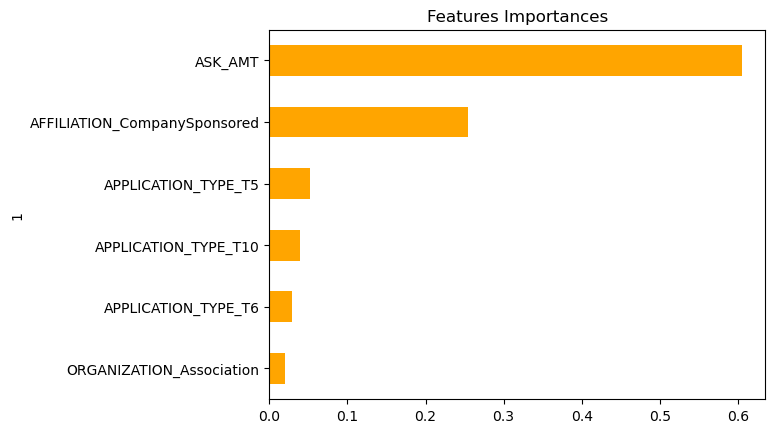

In [23]:
importances_df = pd.DataFrame(sorted(zip(dtree.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='orange', title= 'Features Importances', legend=False)

In [23]:
# saving the dataframe
importances_sorted.to_csv('Features_Importances_droped_clms.csv')

## Model Tune up

In [24]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim= len(X_train.axes[1])))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model
    

In [25]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs= 80,
    hyperband_iterations=2)

In [26]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=80,validation_data=(X_test_scaled,y_test))

Trial 180 Complete [00h 01m 02s]
val_accuracy: 0.7233819365501404

Best val_accuracy So Far: 0.7240816354751587
Total elapsed time: 00h 43m 38s


In [27]:
# Get top 3 model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

{'activation': 'tanh', 'first_units': 11, 'num_layers': 5, 'units_0': 26, 'units_1': 21, 'units_2': 16, 'units_3': 21, 'units_4': 1, 'tuner/epochs': 80, 'tuner/initial_epoch': 27, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0078'}
{'activation': 'tanh', 'first_units': 6, 'num_layers': 5, 'units_0': 6, 'units_1': 16, 'units_2': 6, 'units_3': 1, 'units_4': 21, 'tuner/epochs': 80, 'tuner/initial_epoch': 27, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0138'}
{'activation': 'tanh', 'first_units': 16, 'num_layers': 5, 'units_0': 21, 'units_1': 1, 'units_2': 1, 'units_3': 21, 'units_4': 16, 'tuner/epochs': 80, 'tuner/initial_epoch': 27, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0137'}


In [45]:
# Evaluate the top 3 models against the test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 1ms/step - accuracy: 0.7241 - loss: 0.5826
Loss: 0.5825886130332947, Accuracy: 0.7240816354751587
268/268 - 0s - 1ms/step - accuracy: 0.7241 - loss: 0.5822
Loss: 0.5822045207023621, Accuracy: 0.7240816354751587
268/268 - 0s - 1ms/step - accuracy: 0.7240 - loss: 0.5835
Loss: 0.583514928817749, Accuracy: 0.7239649891853333


In [46]:
# Get second best model hyperparameters
second_hyper = tuner.get_best_hyperparameters(2)[1]
second_hyper.values

{'activation': 'tanh',
 'first_units': 6,
 'num_layers': 5,
 'units_0': 6,
 'units_1': 16,
 'units_2': 6,
 'units_3': 1,
 'units_4': 21,
 'tuner/epochs': 80,
 'tuner/initial_epoch': 27,
 'tuner/bracket': 3,
 'tuner/round': 3,
 'tuner/trial_id': '0138'}

## Optimized Model

**Note:** Used model tune up function to find top 3 models with best model hyperparameters. Used second best model hyperparameters for my final model. It sugests to use 5 layers and tanh activation function 
    instead of relu. For my final model increased number of epochs from 100 to 200. Also to reduce the noise in the system I used top 6 most important columns based on Decision Tree for feature importances evaluation instead of 43. 

In [47]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.axes[1])
hidden_nodes_layer1 =  6
hidden_nodes_layer2 = 16
hidden_nodes_layer3 =  6
hidden_nodes_layer4 = 1
hidden_nodes_layer5 =  21

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Forth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 21)             │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 327 (1.28 KB)

 Trainable params: 327 (1.28 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [53]:
# Check the data size that goes into the model
display(X_train_scaled.shape)
display(y_train.shape)
X_train.columns

(25724, 6)

(25724, 1)

Index(['ASK_AMT', 'AFFILIATION_CompanySponsored', 'APPLICATION_TYPE_T5',
       'APPLICATION_TYPE_T10', 'ORGANIZATION_Association',
       'APPLICATION_TYPE_T6'],
      dtype='object')

In [50]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=200)

Epoch 1/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - accuracy: 0.6989 - loss: 0.6091
Epoch 2/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - accuracy: 0.7185 - loss: 0.5904
Epoch 3/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.7215 - loss: 0.5876
Epoch 4/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - accuracy: 0.7235 - loss: 0.5851
Epoch 5/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - accuracy: 0.7218 - loss: 0.5860
Epoch 6/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - accuracy: 0.7165 - loss: 0.5912
Epoch 7/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.7188 - loss: 0.5885
Epoch 8/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step - accuracy: 0.7231 - loss: 0.5835
Epoch 9/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.7232 - loss: 0.5833
Epoch 10/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - accuracy: 0.7202 - loss: 0.5867
Epoch 11/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.7258 - loss: 0.5798
Epoch 12/200
804/80

804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - accuracy: 0.7244 - loss: 0.5789
Epoch 68/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - accuracy: 0.7222 - loss: 0.5828
Epoch 69/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - accuracy: 0.7302 - loss: 0.5747
Epoch 70/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - accuracy: 0.7252 - loss: 0.5784
Epoch 71/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - accuracy: 0.7254 - loss: 0.5794
Epoch 72/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - accuracy: 0.7184 - loss: 0.5834
Epoch 73/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - accuracy: 0.7233 - loss: 0.5770
Epoch 74/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - accuracy: 0.7200 - loss: 0.5836
Epoch 75/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - accuracy: 0.7254 - loss: 0.5805
Epoch 76/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.7197 - loss: 0.5824
Epoch 77/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - accuracy: 0.7238 - loss: 0.5809
Epoch 78/200
804/804 ━━

804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - accuracy: 0.7221 - loss: 0.5808
Epoch 133/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - accuracy: 0.7216 - loss: 0.5817
Epoch 134/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - accuracy: 0.7194 - loss: 0.5816
Epoch 135/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.7203 - loss: 0.5831
Epoch 136/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - accuracy: 0.7199 - loss: 0.5834
Epoch 137/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - accuracy: 0.7287 - loss: 0.5739
Epoch 138/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - accuracy: 0.7240 - loss: 0.5779
Epoch 139/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - accuracy: 0.7215 - loss: 0.5803
Epoch 140/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.7232 - loss: 0.5797
Epoch 141/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - accuracy: 0.7227 - loss: 0.5792
Epoch 142/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - accuracy: 0.7207 - loss: 0.5814
Epoch 143/200

804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.7238 - loss: 0.5784
Epoch 198/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.7207 - loss: 0.5796
Epoch 199/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - accuracy: 0.7283 - loss: 0.5735
Epoch 200/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step - accuracy: 0.7230 - loss: 0.5793


In [51]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 985us/step - accuracy: 0.7208 - loss: 0.5815
Loss: 0.581484854221344, Accuracy: 0.7208163142204285


In [52]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")